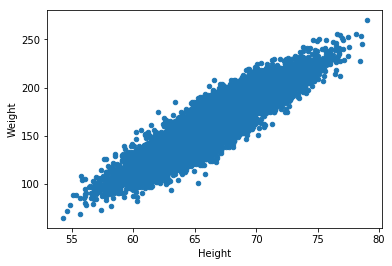

In [4]:
import pandas as pd
np = pd.np
import matplotlib
%matplotlib inline
df = pd.read_csv('../shared-resources/heights_weights_genders.csv')
df.plot.scatter(x='Height', y='Weight')
# !pip install keras
import keras

In [5]:
X = df[['Height', 'Weight']].values
y = (df.Gender == 'Female').astype(int)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### keras documentation:

1. [activation functions](https://keras.io/activations/)  
2. [loss functions](https://keras.io/losses/)  
3. [optimization algorithms](https://keras.io/optimizers/)  

In [9]:
from keras.models import Sequential
from keras.layers import Activation, Dense

model = Sequential()
model.add(Dense(1, input_shape=X.shape[1:]))  # model.layers[0].get_weights()[:].shape: [(2,),]
model.add(Activation('linear'))  # relu, softmax, sigmoid
model.compile(loss='mean_squared_error', optimizer='sgd') 
# notice that there are 2 random weights and a bias (initialized to zero), just like we had before
print(model.layers[0].get_weights())
    
    

[array([[ 0.80546439],
       [ 0.09648192]], dtype=float32), array([ 0.], dtype=float32)]


In [10]:
model.fit(X, y, epochs=10, batch_size=10000)

Epoch 1/10
10000/10000 [==============================] - 0s - loss: 0.3245     
Epoch 2/10
10000/10000 [==============================] - 0s - loss: 0.2508     
Epoch 3/10
10000/10000 [==============================] - 0s - loss: 0.2010     
Epoch 4/10
10000/10000 [==============================] - 0s - loss: 0.1676     
Epoch 5/10
10000/10000 [==============================] - 0s - loss: 0.1450     
Epoch 6/10
10000/10000 [==============================] - 0s - loss: 0.1298     
Epoch 7/10
10000/10000 [==============================] - 0s - loss: 0.1194     
Epoch 8/10
10000/10000 [==============================] - 0s - loss: 0.1124     
Epoch 9/10
10000/10000 [==============================] - 0s - loss: 0.1076     
Epoch 10/10
10000/10000 [==============================] - 0s - loss: 0.1043     


In [14]:
ypred = model.predict(X)
print(ypred.shape)
print(y.shape)
mad = np.abs(ypred - y.reshape(len(y), 1)).mean()
print(mad)

(10000, 1)
(10000,)
0.272834052926


/home/hobs/.virtualenvs/civicu/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


In [ ]:
# Your turn: compute RMSE and compare to your "Pure Python" accuracy

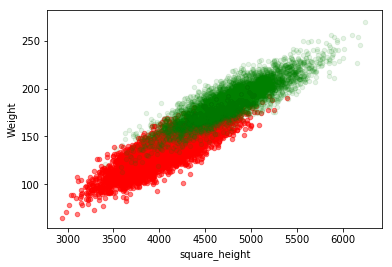

In [32]:
# Your turn: plot your results
mask = df.Gender == 'Female'
ax = df[mask].plot(kind='scatter', alpha=.5, x='square_height', y='Weight', c='red')
df[~mask].plot(ax=ax, alpha=.1, kind='scatter', x='square_height', y='Weight', c='green')

In [ ]:
# can you think of a better NN architecture?
# Your turn: add another neuron, do you get better accuracy if it's on the same layer (parallel) or on a second layer (in series)
# Your turn: now you have a "budget" of 3 neurons... give it a go!